In [1]:
import importlib
import config
importlib.reload(config)
print('Using classifier: ', config.classifier.__class__.__name__)
print('Using feature selection: ', config.feature_selection)
print('Using feature significance test: ', config.significance_test)
print('imblearn sampling algo:', config.sampling_algo.__class__.__name__)
print('Significance level during RFE', config.alpha)
print('Number of RFE features', config.no_selected_rfe)
print('Which type of model: \n', 'Only campaing: ', config.only_campaign, 
      '; Only non campaign: ', config.only_non_campaign)
print('Selected categorical features:\n', config.selected_categorical_features)
print('Selected oridnal columns:\n', config.selected_ordinal_features)


Using classifier:  LogisticRegression
Using feature selection:  True
Using feature significance test:  False
imblearn sampling algo: SMOTE
Significance level during RFE 0.1
Number of RFE features 20
Which type of model: 
 Only campaing:  True ; Only non campaign:  False
Selected categorical features:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Selected oridnal columns:
 ['age', 'cons.price.idx', 'cons.conf.idx', 'y']


In [2]:
# remove campaign related features
config.selected_categorical_features = ['job', 'marital', 'education', 'default',
                                        'housing', 'loan']
config.selected_ordinal_features = ['age', "y"]
print('Selected oridnal columns:\n', config.selected_ordinal_features)

import campaign
importlib.reload(campaign)

Selected oridnal columns:
 ['age', 'y']


<module 'campaign' from '/home/sudiptra/repos/campaign/campaign.py'>

In [3]:
print(config.selected_categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [4]:
X, y = campaign.data_prep(config)

In [5]:
clf, best_score, coefs, X_test, y_test = campaign.analyze(config, X, y)

Before balancing dataset and feature selection
Accuracy on test set: 0.88
Test Set confusion matrix:
    pred_0  pred_1
0    4600      18
1     640      35
Classification Report:
 {'precision': 0.660377358490566, 'recall': 0.05185185185185185, 'f1-score': 0.09615384615384615, 'support': 675, 'fbeta2': 0.59163179916318}
Classification report:
 {'0': {'precision': 0.8778625954198473, 'recall': 0.996102208748376, 'f1-score': 0.9332521809697708, 'support': 4618}, '1': {'precision': 0.660377358490566, 'recall': 0.05185185185185185, 'f1-score': 0.09615384615384615, 'support': 675, 'fbeta2': 0.59163179916318}, 'micro avg': {'precision': 0.8756848668052144, 'recall': 0.8756848668052144, 'f1-score': 0.8756848668052144, 'support': 5293}, 'macro avg': {'precision': 0.7691199769552066, 'recall': 0.5239770303001139, 'f1-score': 0.5147030135618085, 'support': 5293}, 'weighted avg': {'precision': 0.8501273724976359, 'recall': 0.8756848668052144, 'f1-score': 0.8264996066261567, 'support': 5293}}
Befor

In [6]:
# now change config
import importlib
importlib.reload(config)
config.only_campaign = False 
config.only_non_campaign = True

In [7]:
import utils
importlib.reload(utils)

<module 'utils' from '/home/sudiptra/repos/campaign/utils.py'>

Average precision-recall score: 0.30


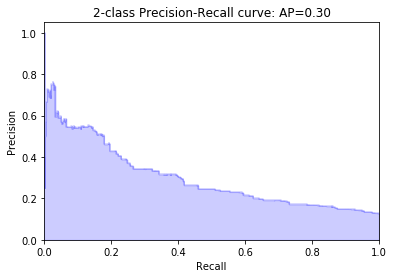

In [8]:
utils.plot_precision_recall_curve(clf, X_test[coefs.keys()], y_test)

   pred_0  pred_1
0    2824    1794
1     235     440


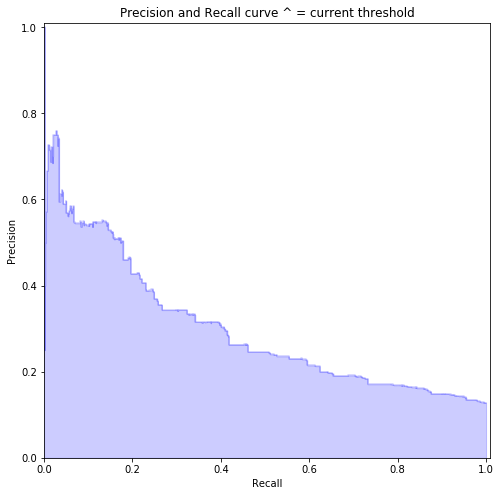

   pred_0  pred_1
0    2828    1790
1     235     440


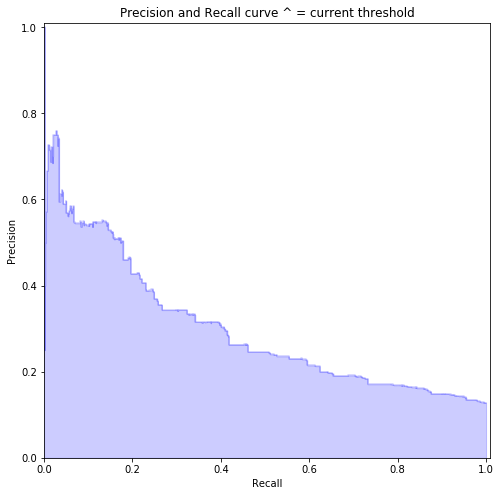

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      4618
           1       0.23      0.58      0.33       675

   micro avg       0.70      0.70      0.70      5293
   macro avg       0.58      0.65      0.57      5293
weighted avg       0.83      0.70      0.74      5293



In [9]:
utils.precision_recall_threshold(clf, X_test[coefs.keys()], y_test, t=0.462)
utils.precision_recall_threshold(clf, X_test[coefs.keys()], y_test, t=0.47)
y_adjusted_pred = clf.predict_proba(X_test[coefs.keys()])[:, 1] > .5
print(utils.classification_report(y_test, y_adjusted_pred))

# The threshold to hit the FP ~ 10FN target, was not possible due to 
# the non-linear decision boundaries of RF.
# Threshold of 0.46 to 0.47 resulted in a large step change in recall/precision
# Should look at LogisticRegression as this will be smoother.

Average precision-recall score: 0.30


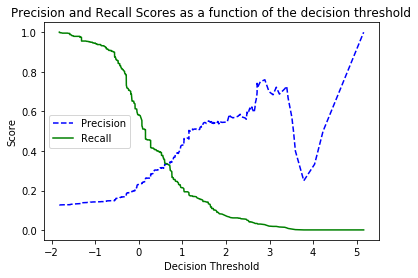

In [10]:
# precision recall threshold curve
utils.plot_precision_recall_vs_threshold(clf, X_test[coefs.keys()], y_test)
